In [2]:
%cd ~/Desktop/repos/analisi_dati/final-task/
%load_ext autoreload
%autoreload 2

/Users/lucaarnaboldi/Desktop/repos/analisi_dati/final-task


In [3]:
from metrics import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Computing full oversampling...


### First steps

In [4]:
candidates = [
  ('raw', X_train, cY_train, X_valid),
  ('extended', eX_train, ecY_train,  X_valid),
  ('eFFT', eX_train_ft, ecY_train, X_valid_ft),
  ('ediff', eX_train_diff, ecY_train, X_valid_diff),
]

for label, Xt, Yt, Xv in candidates:
  rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=10
  )

  rf.fit(Xt, Yt)
  Yp = rf.predict(Xv)
  metrics = evaluate_model(cY_valid, Yp)

  print(f'{label}: {metrics}')

raw: (0.7463395065855453, 0.5570295474303983, 0.8069204506051432, 0.5984904515056928)
extended: (0.6862672995921643, 0.7174022623487848, 0.5669279543409558, 0.5908871965972116)
eFFT: (0.563147690044795, 0.6203376161047895, 0.4421386056293416, 0.4541461121903565)
ediff: (0.647155178177442, 0.6779567943366661, 0.5220955592939778, 0.5351042138149831)


### Raw optimization

In [7]:
rf_selection = GridSearchCV(
  RandomForestClassifier(),
  # First attempt:
  # {'n_estimators':[30,50,70], 'max_depth':[10,15,20]},
  # best -> 70, 20
  {'n_estimators':[70,90,110], 'max_depth':[20,25,30]},
  scoring=CVscoring,
  n_jobs=-1,
  verbose=3,
)

rf_selection.fit(X_train,cY_train)

print(rf_selection.best_params_)
print(rf_selection.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 4/5] END .....max_depth=20, n_estimators=70;, score=1.523 total time= 1.6min
[CV 2/5] END .....max_depth=20, n_estimators=70;, score=1.522 total time= 1.6min
[CV 3/5] END .....max_depth=20, n_estimators=70;, score=1.518 total time= 1.6min
[CV 5/5] END .....max_depth=20, n_estimators=70;, score=1.530 total time= 1.6min
[CV 1/5] END .....max_depth=20, n_estimators=70;, score=1.524 total time= 1.6min
[CV 1/5] END .....max_depth=20, n_estimators=90;, score=1.527 total time= 2.1min
[CV 3/5] END .....max_depth=20, n_estimators=90;, score=1.518 total time= 2.1min
[CV 2/5] END .....max_depth=20, n_estimators=90;, score=1.523 total time= 2.1min
[CV 4/5] END .....max_depth=20, n_estimators=90;, score=1.523 total time= 1.9min
[CV 5/5] END .....max_depth=20, n_estimators=90;, score=1.529 total time= 1.9min
[CV 1/5] END .....max_depth=25, n_estimators=70;, score=1.543 total time= 1.5min
[CV 1/5] END ....max_depth=20, n_estimators=110;,

#### Training the best

In [23]:
rf = RandomForestClassifier(
  n_estimators=90,
  max_depth=30,
  n_jobs=-1
)

rf.fit(X_train, cY_train)
Yp = rf.predict(X_valid)
metrics = evaluate_model(cY_valid, Yp)

In [24]:
print(metrics)
plot_confusion_matrix(cY_valid, Yp, show=True, filename='figures/random-forest/raw-best.pdf')

(0.8204185331283012, 0.6997984411059237, 0.8227431988025908, 0.736170500532483)


### Extended optimization

In [18]:
rf_selection = GridSearchCV(
  RandomForestClassifier(),
  # First attempt:
  # {'n_estimators':[70,90,110], 'max_depth':[20,25,30]},
  # best -> 110, 30
  {'n_estimators':[110,130,150], 'max_depth':[30,35,40]},
  scoring=CVscoring,
  n_jobs=-1,
  verbose=3,
)

rf_selection.fit(eX_train,ecY_train)

print(rf_selection.best_params_)
print(rf_selection.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 5/5] END ....max_depth=30, n_estimators=110;, score=1.949 total time=18.0min
[CV 4/5] END ....max_depth=30, n_estimators=110;, score=1.942 total time=18.0min
[CV 3/5] END ....max_depth=30, n_estimators=110;, score=1.930 total time=18.1min
[CV 2/5] END ....max_depth=30, n_estimators=110;, score=1.925 total time=18.2min
[CV 1/5] END ....max_depth=30, n_estimators=110;, score=1.928 total time=18.7min
[CV 3/5] END ....max_depth=30, n_estimators=130;, score=1.928 total time=21.2min
[CV 2/5] END ....max_depth=30, n_estimators=130;, score=1.925 total time=21.3min
[CV 1/5] END ....max_depth=30, n_estimators=130;, score=1.927 total time=21.8min
[CV 4/5] END ....max_depth=30, n_estimators=130;, score=1.942 total time=20.6min
[CV 5/5] END ....max_depth=30, n_estimators=130;, score=1.950 total time=20.5min
[CV 1/5] END ....max_depth=35, n_estimators=110;, score=1.930 total time=18.5min
[CV 2/5] END ....max_depth=30, n_estimators=150;,

#### Training best

##### 30, 110

In [25]:
rf_extended1 = RandomForestClassifier(
  n_estimators=110,
  max_depth=30,
  n_jobs=-1
)

rf_extended1.fit(eX_train, ecY_train)
Yp = rf_extended1.predict(X_valid)
metrics = evaluate_model(cY_valid, Yp)

(0.827973524102427, 0.768376881381858, 0.7542470407964204, 0.7598555203677119)


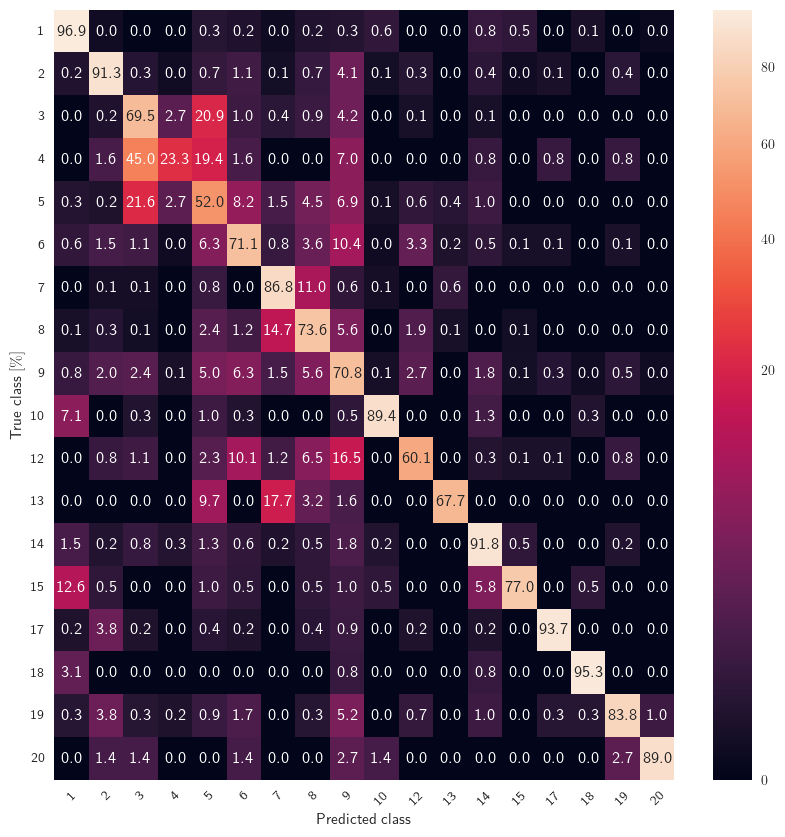

In [26]:
print(metrics)
plot_confusion_matrix(cY_valid, Yp, show=True)

##### 40, 150

In [33]:
rf_extended2 = RandomForestClassifier(
  n_estimators=150,
  max_depth=40,
  n_jobs=-1
)

rf_extended2.fit(eX_train, ecY_train)
Yp = rf_extended2.predict(X_valid)
metrics = evaluate_model(cY_valid, Yp)

(0.8282409574112456, 0.7678833909963365, 0.7566706907330738, 0.7607606087781869)


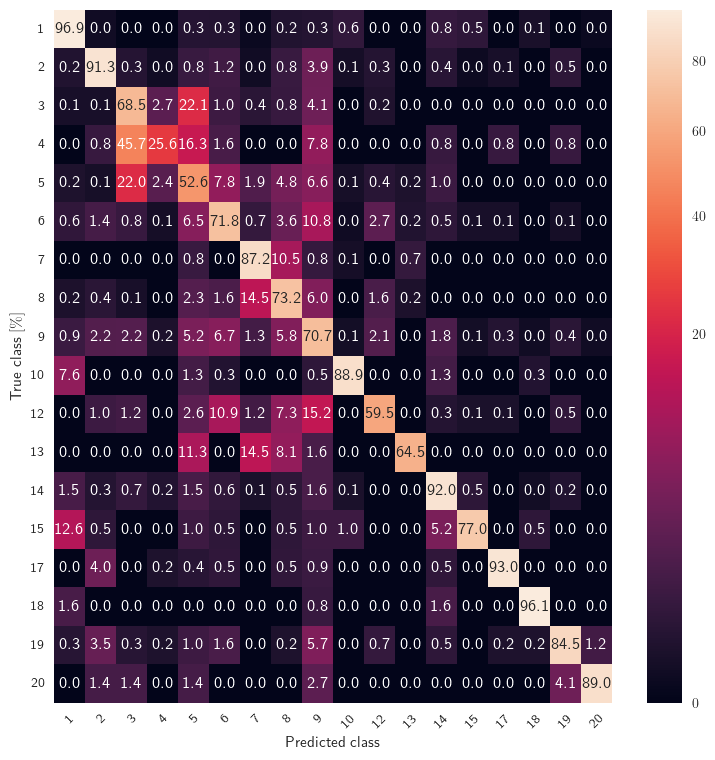

In [34]:
print(metrics)
plot_confusion_matrix(cY_valid, Yp, show=True, filename = 'figures/random-forest/extended-best.pdf')

# Training the final classifier

In [5]:
rf_final = RandomForestClassifier(
  n_estimators=150,
  max_depth=40,
  n_jobs=-1
)
rf_final.fit(eX, ecY)

RandomForestClassifier(max_depth=40, n_estimators=150, n_jobs=-1)

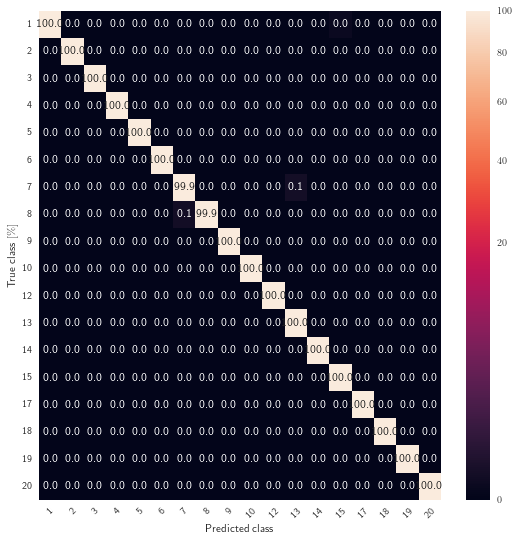

In [6]:
Yp = rf_final.predict(X_valid)
metrics = evaluate_model(cY_valid, Yp)
plot_confusion_matrix(cY_valid, Yp,show=True)

In [7]:
from joblib import dump

dump(rf_final, 'final_predictor.joblib')

['final_predictor.joblib']